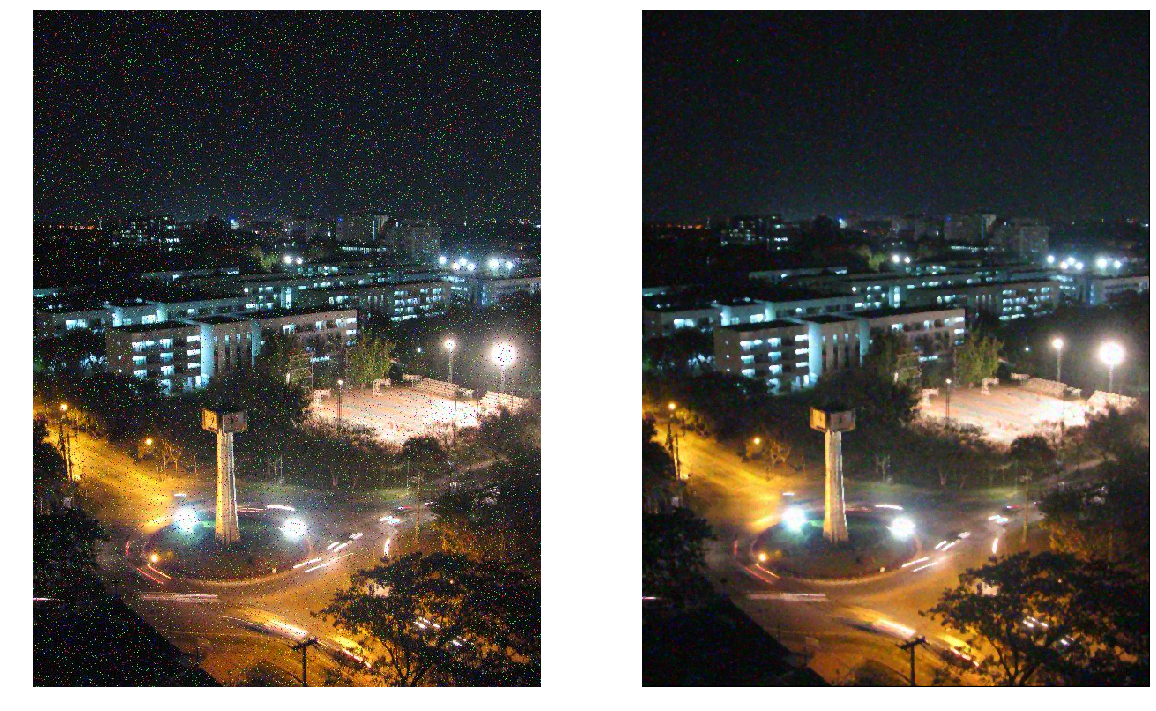

In [2]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import time

def medianfilter(img, k):
    image = np.array(img)
    output = np.zeros(tuple([image.shape[0],image.shape[1]]))
    image_padded = np.zeros((image.shape[0] + k-1, image.shape[1] + k-1))
    image_padded[0:image.shape[0],0:image.shape[1]] = image

    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x] = np.median(image_padded[y:y+k,x:x+k])        
    return output

def medianFilter3D(img, k):
    img = np.array(img)
    
    ans1 = medianfilter(img[:,:,0],k)
    ans2 = medianfilter(img[:,:,1],k)
    ans3 = medianfilter(img[:,:,2],k)

    ans = np.zeros(img.shape)
    ans[:,:,0] = ans1
    ans[:,:,1] = ans2
    ans[:,:,2] = ans3
    
    return ans.astype('uint8')
    
img = Image.open('../input/Degraded.jpg')
img1 = Image.open('../input/Clear.jpg')
img = np.array(img)
# print(img.shape)
ans = medianFilter3D(img, 3)
# print(ans.shape)
# print(img.shape)

fig = plt.figure(figsize=[20, 20])
plt.subplot(1,2,1);plt.imshow(img);plt.axis('off')
plt.subplot(1,2,2);plt.imshow(ans);plt.axis('off')
plt.show()